In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the dataset

df = pd.read_csv("CarPrice_Assignment.csv")

# Display first few rows
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# Check data types and missing values
df.info()

# Summary statistics
df.describe()

# Check duplicate rows
df.duplicated().sum()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
# Extract Car Brand from CarName
df['CarBrand'] = df['CarName'].apply(lambda x: x.split()[0])

# Drop CarName column (not needed)
df.drop(columns=['CarName'], inplace=True)

# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['CarBrand', 'fueltype', 'aspiration', 'doornumber', 
                                 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 
                                 'cylindernumber', 'fuelsystem'], drop_first=True)

# Display processed dataset
df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False


In [9]:
from sklearn.model_selection import train_test_split

# Define independent variables X and target variable y
X = df.drop(columns=['price'])
y = df['price']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
#y_pred_lr = lr_model.predict(X_test)
print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)

Coefficients: [ 9.23896038e+01 -1.98652310e+02  1.94138505e+02 -1.63601824e+02
  5.18439197e+02 -1.59027618e+02  6.82023209e+00  8.89750025e+01
 -3.65486921e+03 -1.08784341e+03 -2.11130620e+02  4.93241469e+00
  1.77272392e+00  3.21644116e+00  8.08822175e+01  1.22710587e+04
  1.29533611e+04  1.63509473e+04  9.86899315e+03  4.73103687e+03
  3.94020026e+03  5.68356822e+03  4.34540272e+03  8.27227767e+03
  3.34709392e+03  4.12990034e+03  1.71006469e+03 -1.24188061e+03
  2.53449356e+02 -1.54430992e+03 -4.94954152e+03  1.81674678e+03
  3.93494942e+03 -3.43582587e+03  5.01896508e+02 -6.48466123e+03
 -7.23868769e+03 -8.67827399e+03  2.02362571e-11 -7.94414309e+03
 -7.86271154e+03 -7.28981725e+03 -2.07336626e+03  1.94042985e+03
 -4.33768527e+02 -1.18633568e+03 -1.88961679e+03 -1.61288345e+03
 -2.03223056e+03  3.20104875e+02  7.04543004e+02  8.95707499e+03
 -4.45899656e+03 -1.54430992e+03  2.84797923e+02  2.47241375e+03
 -2.70963100e+03  2.35136551e+03 -4.08685581e+03 -1.92447344e+03
 -3.8243195

In [65]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
print("Feature Importances:", dt_model.feature_importances_)

Feature Importances: [2.07438357e-02 1.76511314e-05 3.81419730e-03 2.65057568e-03
 9.33210339e-03 4.22256733e-03 2.61409005e-01 6.49558811e-01
 6.45960217e-05 7.94591735e-03 1.38020151e-04 3.96776547e-03
 8.40836477e-03 5.71456774e-03 1.78087199e-02 0.00000000e+00
 0.00000000e+00 1.11976709e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.85834742e-07 2.00935294e-05 0.00000000e+00 4.57784379e-04
 0.00000000e+00 0.00000000e+00 4.04392297e-05 1.15023555e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.32276366e-07
 6.31332744e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.03661110e-06
 2.78195767e-05 8.95120680e-04 9.18886817e-04 2.26685867e-05
 0.00000000e+00 1.02603056e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.63458169e-04 0.00000000e+00 0.00000000e+00 1.73853094e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.

In [69]:
# Random Frorest Regressor 
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Feature Importances:", rf_model.feature_importances_)

Feature Importances: [2.06769421e-02 6.98685375e-04 6.18766202e-03 6.53866465e-03
 1.11708091e-02 2.37728350e-03 2.94660675e-01 5.50505994e-01
 3.22703821e-03 3.29818929e-03 3.72119899e-03 2.78908804e-02
 4.92231126e-03 3.89724654e-03 4.38172719e-02 4.55862622e-06
 4.72344475e-05 4.34887132e-03 1.42006091e-04 1.17892325e-05
 1.47699259e-05 5.79551536e-05 1.86919604e-04 3.67508510e-06
 1.37241775e-05 9.90760587e-05 2.90525885e-05 7.35632977e-05
 1.12946567e-04 7.24002538e-05 5.37055024e-05 1.34797399e-04
 2.66781729e-04 6.26383059e-05 2.62377883e-05 9.68980327e-06
 1.44694765e-04 2.55983623e-08 0.00000000e+00 3.59682074e-05
 1.84647453e-04 7.02943639e-05 1.42324044e-04 4.75822120e-04
 4.04887571e-04 5.20892703e-04 1.30369537e-03 7.19346567e-04
 2.66539510e-04 3.47303359e-04 6.57996648e-04 1.04115790e-05
 2.92151834e-08 7.87650988e-05 6.09856759e-04 5.26017644e-05
 3.61309742e-05 3.11611472e-05 1.81752924e-05 1.62782414e-03
 1.96905459e-04 0.00000000e+00 7.00034568e-06 7.86040764e-05
 3.

In [73]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
print("Feature Importances:", gb_model.feature_importances_)

Feature Importances: [1.89393861e-02 6.04521587e-04 1.39839201e-02 1.02065101e-02
 1.29605196e-02 1.70883200e-03 1.68533637e-01 6.06461433e-01
 3.19754742e-03 2.92632602e-03 2.48806880e-03 4.47936098e-02
 1.80567039e-03 2.15868957e-03 6.47496451e-02 7.53489359e-05
 4.85863222e-04 6.33832239e-03 0.00000000e+00 0.00000000e+00
 6.12002705e-05 1.12946745e-05 4.05880676e-04 0.00000000e+00
 0.00000000e+00 6.87212548e-05 0.00000000e+00 0.00000000e+00
 9.72628048e-05 3.93548512e-04 9.94192143e-05 1.56276392e-04
 1.85159859e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.85521473e-04 9.16469913e-06 1.39602041e-03
 3.60228868e-05 3.38562129e-04 6.51051448e-04 5.08135476e-06
 7.33987355e-05 8.43740845e-05 7.78990829e-03 0.00000000e+00
 0.00000000e+00 3.53940886e-04 1.09204230e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.98936641e-02
 7.69186778e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.

In [77]:
# SVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scaling features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
y_pred = svr_model.predict(X_test_scaled)

# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 86892131.60173689
R-squared: -0.10068033821326794


In [81]:
# Model Evaluation
# R2 Score higher is better
# MSE Lower is better 
# MAE Lower is better
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    "Linear Regression": lr_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "Support Vector Regressor": svr_model
}

# Evaluate each model
for name, model in models.items():
    if name == "Support Vector Regressor":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)

    print(f"Model: {name}")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print("-" * 40)

Model: Linear Regression
R² Score: 0.8985
MSE: 8015937.5058
MAE: 1907.0925
----------------------------------------
Model: Decision Tree
R² Score: 0.8883
MSE: 8814274.1203
MAE: 1946.2480
----------------------------------------
Model: Random Forest
R² Score: 0.9574
MSE: 3365573.5527
MAE: 1297.8813
----------------------------------------
Model: Gradient Boosting
R² Score: 0.9281
MSE: 5675474.3501
MAE: 1702.4874
----------------------------------------
Model: Support Vector Regressor
R² Score: -0.1007
MSE: 86892131.6017
MAE: 5701.5500
----------------------------------------


Top 10 Most Important Features:
         Feature  Importance
7     enginesize    0.550506
6     curbweight    0.294661
14    highwaympg    0.043817
11    horsepower    0.027891
0         car_ID    0.020677
4       carwidth    0.011171
3      carlength    0.006539
2      wheelbase    0.006188
12       peakrpm    0.004922
17  CarBrand_bmw    0.004349


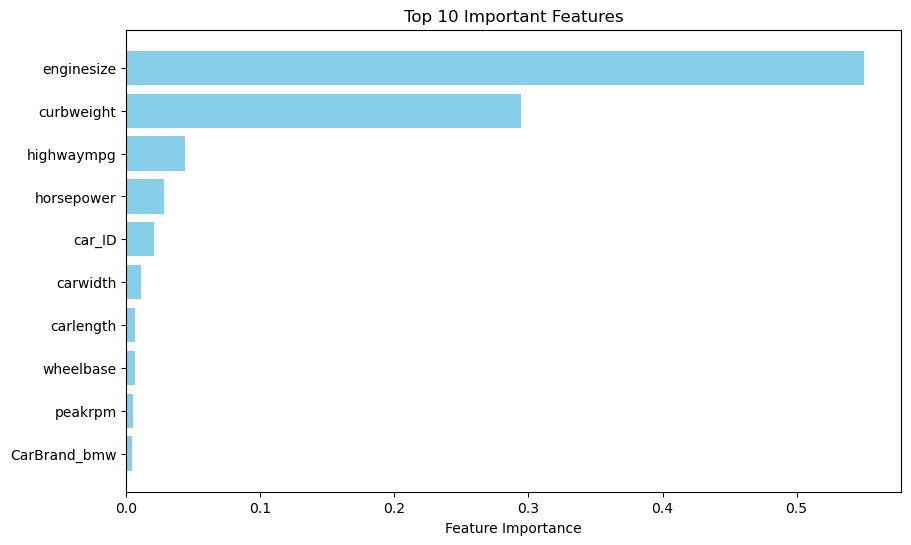

In [47]:
# Get feature importance from Random Forest
feature_importances = rf_model.feature_importances_


# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print top important features
print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]
features = X.columns[sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features[:10], feature_importance[sorted_idx][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()
plt.show()

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the regression model
model = RandomForestRegressor()

# Setup the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit grid search
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
